In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/air_conditioner_prices_dataset.csv')

In [3]:
df.head(10)

,Brand,Capacity (BTUs),EER/SEER,Type,Features,Location,Age (years),Price ($)
0,Brand A,18000,14.6,Portable,Quiet,India,3,239
1,Brand C,8000,12.3,Portable,WiFi,USA,4,348
2,Brand B,15000,12.4,Window,WiFi,Europe,4,325
3,Brand C,18000,15.6,Split,Standard,Australia,4,480
4,Brand C,12000,17.5,Portable,"Inverter Technology, WiFi",Australia,2,881
5,Brand C,8000,12.4,Split,Compact,Europe,2,678
6,Brand A,18000,19.1,Split,"Compact, Inverter Technology",India,4,593
7,Brand A,12000,17.6,Portable,Standard,Australia,3,529
8,Brand A,12000,16.6,Split,Standard,India,3,579
9,Brand C,12000,14.8,Portable,"WiFi, Standard",USA,2,282


In [4]:
df.shape

(200, 8)

In [6]:
df.isnull().sum()

Brand              0
Capacity (BTUs)    0
EER/SEER           0
Type               0
Features           0
Location           0
Age (years)        0
Price ($)          0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Capacity (BTUs),EER/SEER,Age (years),Price ($)
count,200.000000,200.000000,200.000000,200.000000
mean,12305.000000,16.112500,2.360000,604.850000
std,3507.633456,2.386687,1.129949,222.109931
min,8000.000000,12.000000,1.000000,203.000000
25%,10000.000000,13.850000,1.000000,435.500000
50%,12000.000000,16.400000,2.000000,592.500000
75%,15000.000000,18.050000,3.000000,802.500000
max,18000.000000,20.000000,4.000000,998.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    object 
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    object 
 4   Features         200 non-null    object 
 5   Location         200 non-null    object 
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Type'] = le.fit_transform(df['Type'])
df['Features'] = le.fit_transform(df['Features'])
df['Location'] = le.fit_transform(df['Location'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    int64  
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    int64  
 4   Features         200 non-null    int64  
 5   Location         200 non-null    int64  
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


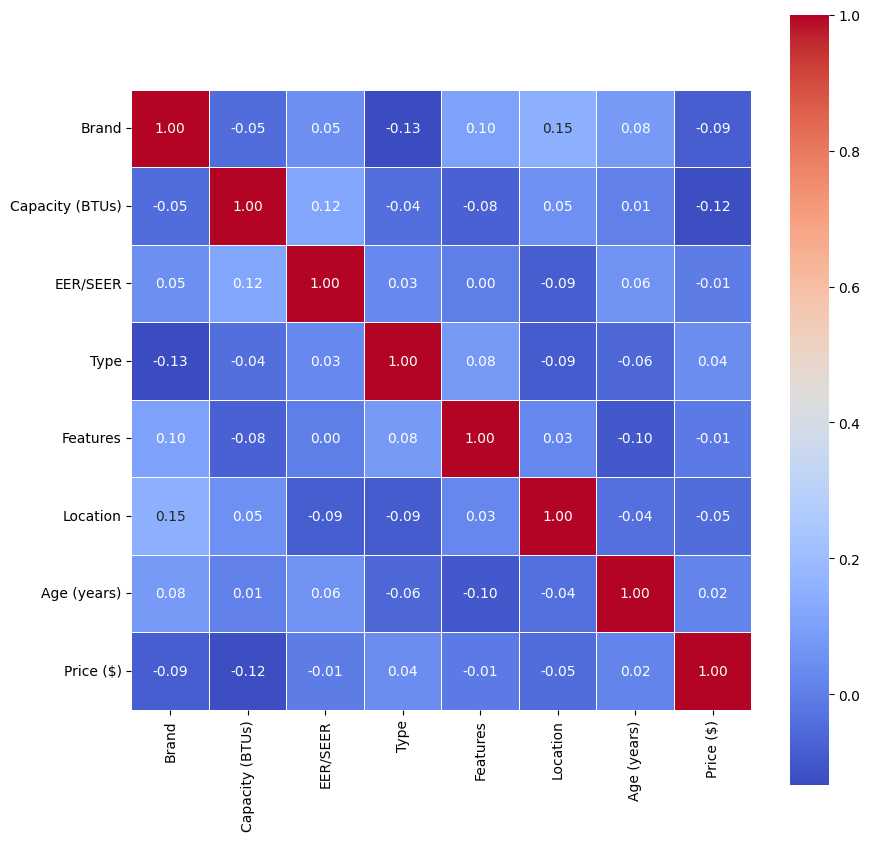

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,square=True,annot_kws={'size':10})
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    int64  
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    int64  
 4   Features         200 non-null    int64  
 5   Location         200 non-null    int64  
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


In [14]:
df.groupby('Brand')['Price ($)'].mean()

Brand
0    627.098592
1    605.645161
2    580.537313
Name: Price ($), dtype: float64

In [15]:
df.groupby('Type')['Capacity (BTUs)'].mean()

Type
0    12369.863014
1    12555.555556
2    11984.375000
Name: Capacity (BTUs), dtype: float64

In [16]:
df.groupby('Features')['Price ($)'].mean()

Features
0     554.533333
1     720.000000
2     680.800000
3     689.666667
4     684.500000
5     614.777778
6     604.384615
7     755.400000
8     450.500000
9     616.500000
10    653.333333
11    706.714286
12    576.240000
13    483.750000
14    567.833333
15    459.500000
16    458.000000
17    585.500000
18    657.611111
19    713.666667
20    485.333333
21    543.666667
22    837.000000
23    695.000000
24    592.074074
25    804.000000
26    592.200000
27    734.500000
28    467.400000
29    691.333333
Name: Price ($), dtype: float64

In [17]:
df.groupby('Location')['Price ($)'].mean()

Location
0    623.346939
1    611.575000
2    589.293103
3    599.698113
Name: Price ($), dtype: float64

<Axes: xlabel='Brand'>

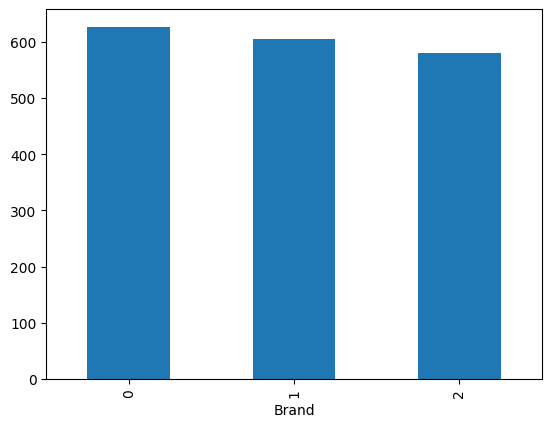

In [18]:
df.groupby('Brand')['Price ($)'].mean().plot(kind='bar')

<Axes: xlabel='Type'>

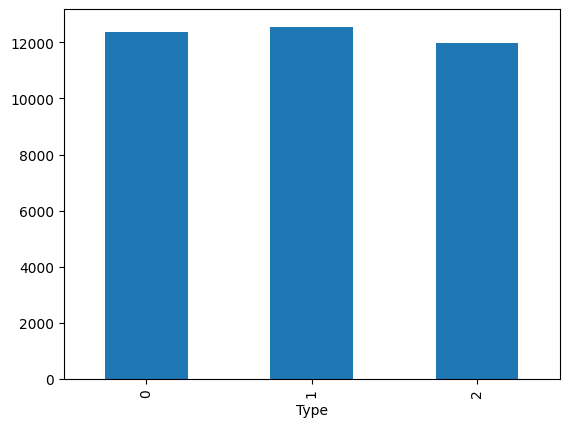

In [19]:
df.groupby('Type')['Capacity (BTUs)'].mean().plot(kind='bar')

<Axes: xlabel='Features'>

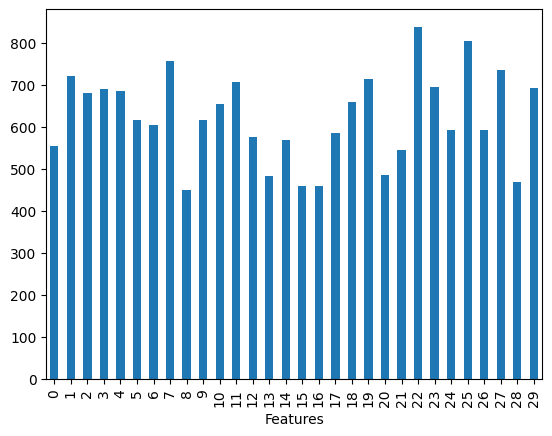

In [20]:
df.groupby('Features')['Price ($)'].mean().plot(kind='bar')

<Axes: xlabel='Location'>

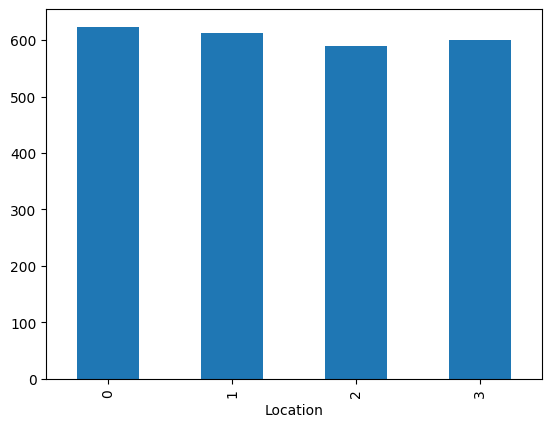

In [21]:
df.groupby('Location')['Price ($)'].mean().plot(kind='bar')

<Axes: xlabel='Capacity (BTUs)', ylabel='Price ($)'>

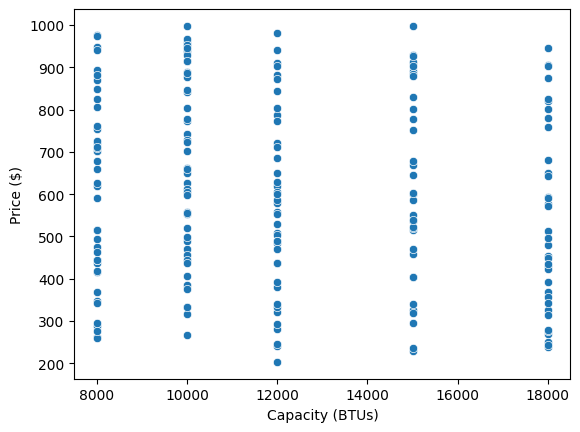

In [24]:
sns.scatterplot(x='Capacity (BTUs)',y='Price ($)',data=df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    int64  
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    int64  
 4   Features         200 non-null    int64  
 5   Location         200 non-null    int64  
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 12.6 KB


<Axes: xlabel='EER/SEER', ylabel='Price ($)'>

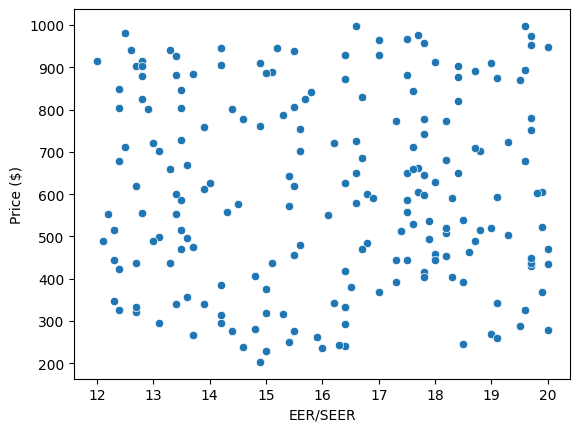

In [27]:
sns.scatterplot(x='EER/SEER',y='Price ($)',data=df)

<Axes: xlabel='EER/SEER', ylabel='Capacity (BTUs)'>

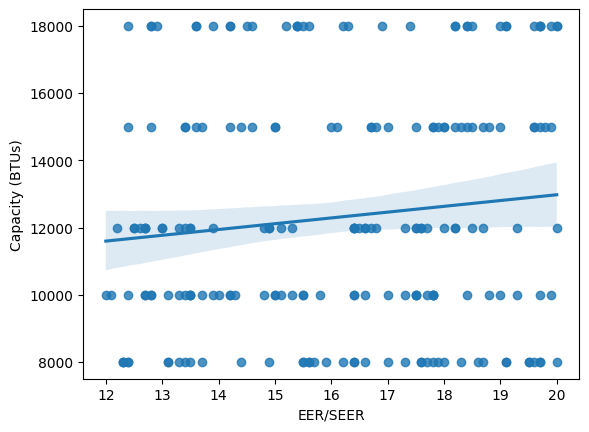

In [28]:
sns.regplot(x='EER/SEER',y='Capacity (BTUs)',data=df)

<Axes: xlabel='Brand'>

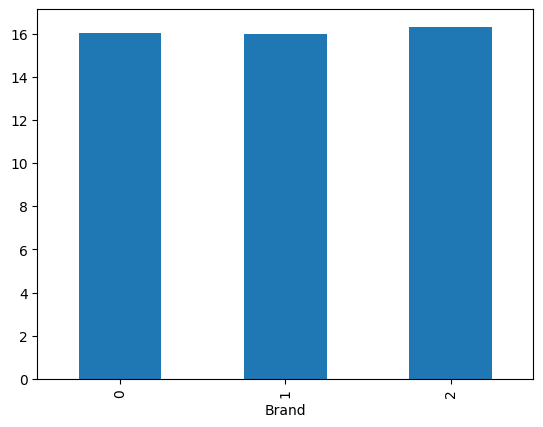

In [29]:
df.groupby('Brand')['EER/SEER'].mean().plot(kind='bar')

<Axes: xlabel='Type'>

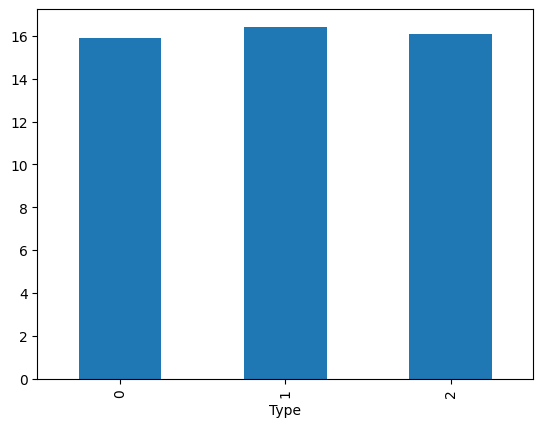

In [30]:
df.groupby('Type')['EER/SEER'].mean().plot(kind='bar')

<Axes: xlabel='Features'>

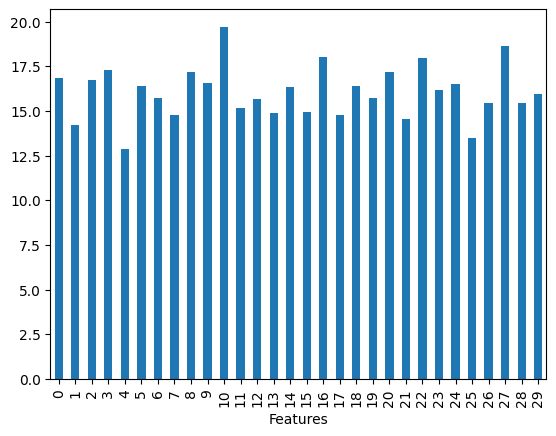

In [31]:
df.groupby('Features')['EER/SEER'].mean().plot(kind='bar')

In [32]:
X = df.drop('Price ($)',axis=1)
y = df['Price ($)']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
df.head()

,Brand,Capacity (BTUs),EER/SEER,Type,Features,Location,Age (years),Price ($)
0,0,18000,14.6,0,12,2,3,239
1,2,8000,12.3,0,24,3,4,348
2,1,15000,12.4,2,24,1,4,325
3,2,18000,15.6,1,18,0,4,480
4,2,12000,17.5,0,11,0,2,881


In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r = r2_score(y_test,y_pred)
ms = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

In [39]:
print('r2_score:',r)
print('mean_squared_error:',ms)
print('mean_absolute_error:',mae)

r2_score: -0.0018749486549849426
mean_squared_error: 52733.28556947576
mean_absolute_error: 201.61487809508435


In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
y_pred2 = rf.predict(X_test)

In [42]:
print('r2_score:',r2_score(y_test,y_pred2))

r2_score: -0.0879993674654882


In [43]:
print('mean_squared_error:',mean_squared_error(y_test,y_pred2))

mean_squared_error: 57266.409766000004


In [44]:
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred2))

mean_absolute_error: 206.51179999999997


In [45]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [46]:
y_pred3 = dt.predict(X_test)

In [47]:
print('r2_score:',r2_score(y_test,y_pred3))

r2_score: -0.7725682884663176


In [48]:
print('mean_squared_error:',mean_squared_error(y_test,y_pred3))

mean_squared_error: 93298.42


In [49]:
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred3))

mean_absolute_error: 239.94


In [50]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()

In [51]:
kn.fit(X_train,y_train)

KNeighborsRegressor()

In [52]:
y_pred4 = kn.predict(X_test)

In [53]:
print('r2_score:',r2_score(y_test,y_pred4))

r2_score: -0.3250274557048769


In [54]:
print('mean_squared_error:',mean_squared_error(y_test,y_pred4))

mean_squared_error: 69742.288


In [56]:
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred4))

mean_absolute_error: 231.048


In [57]:
import pickle
pickle.dump(lr,open('air_conditioner_prices_dataset.pkl','wb'))

In [58]:
pickle.dump(ss,open('air_conditioner_prices_dataset_ss.pkl','wb'))

In [59]:
pickle.dump(rf,open('air_conditioner_prices_dataset_rf.pkl','wb'))
pickle.dump(dt,open('air_conditioner_prices_dataset_dt.pkl','wb'))
pickle.dump(kn,open('air_conditioner_prices_dataset_kn.pkl','wb'))